In [42]:
#import packages
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings("ignore")

In [43]:
#import the data
data = xr.open_dataset("data/Ghana_chirps_dRR_1991_2020.nc")

#data = data['precip'].where(data['precip']!=-99)

In [44]:
print(data)

<xarray.Dataset> Size: 26MB
Dimensions:    (time: 10958, longitude: 20, latitude: 30)
Coordinates:
  * time       (time) datetime64[ns] 88kB 1991-01-01 1991-01-02 ... 2020-12-31
  * longitude  (longitude) float32 80B -3.375 -3.125 -2.875 ... 1.125 1.375
  * latitude   (latitude) float32 120B 4.625 4.875 5.125 ... 11.38 11.62 11.88
Data variables:
    precip     (time, latitude, longitude) float32 26MB ...
Attributes: (12/17)
    CDI:               Climate Data Interface version 2.0.4 (https://mpimet.m...
    Conventions:       CF-1.6
    institution:       Climate Hazards Group.  University of California at Sa...
    history:           Thu May 30 05:21:22 2024: cdo sellonlatbox,-3.5,1.5,4....
    title:             CHIRPS Version 2.0
    version:           Version 2.0
    ...                ...
    comments:           time variable denotes the first day of the given day.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ft

In [34]:
doy_data = data.mean(['longitude','latitude']).groupby('time.dayofyear')

In [35]:
def stand(x, dim):
    return (x-x.mean(dim = dim))

def inf_check(p, grid=True):
    if grid==True:
        p = p.where(p!=np.inf).where(p!=-np.inf)
    else:
        p[np.isinf(p)==True] == np.nan
    return p

Text(0, 0.5, 'Cumulative daily mean rainfall anomaly')

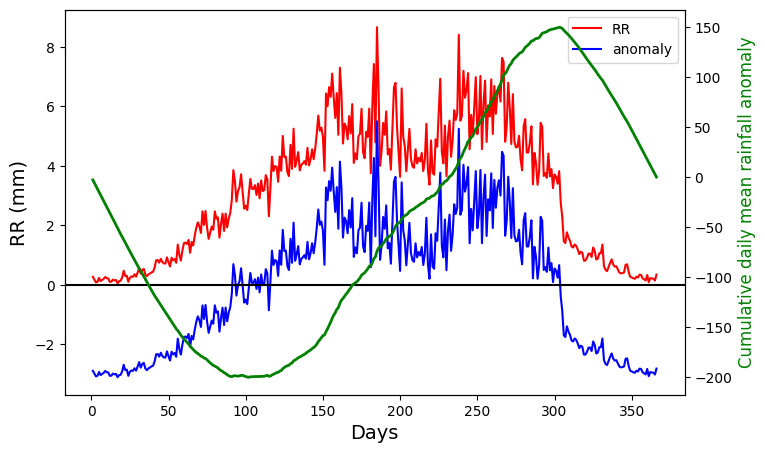

In [41]:
x = list(doy_data.groups.copy())

fig, ax = plt.subplots(figsize=(8,5))

avg_data = inf_check(doy_data.mean(), grid=True)
avg_data.plot (ax=ax, color = 'r', label = 'RR')
stand(avg_data, dim='dayofyear').plot(ax = ax, color='b', label = 'anomaly')

#Legend
ax.legend(loc='upper right', fontsize=10)
ax.set_ylabel('RR (mm)', fontsize=14)
ax.set_xlabel('Days', fontsize =14)

ax.axhline(y=0, color= 'k')


ax1= ax.twinx()
anomaly = stand(avg_data, dim='dayofyear').cumsum()
ax1.plot(x, anomaly, color='g', linewidth=2)
ax1.set_ylabel('Cumulative daily mean rainfall anomaly', fontsize=12, color='g')


In [ ]:
#onset and cessation

